# Violencia Contra la Mujer
Esta base de datos permite acceder a información desagregada sobre hechos de violencia contra la Mujer e Integrantes del Grupo Familiar registrados a nivel nacional, organizada por año, mes, departamento, provincia y distrito. Proporciona datos valiosos para entender la distribución territorial y temporal de la violencia, sirviendo como insumo clave para el diseño de políticas públicas, intervenciones multisectoriales y estrategias de prevención.

Los datos provienen de los registros oficiales del Sistema de Denuncias Policiales (SIDPOL), gestionado por la Policía Nacional del Perú, y son consolidados por la Dirección General de Información para la Seguridad del Ministerio del Interior.

**Diccionario**

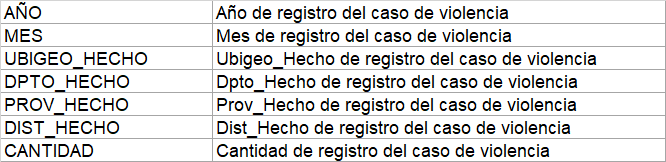

#Extracción de BD

In [ ]:
#Instalar libreria pydrive.
!pip install -U -q pydrive

In [ ]:
#Importar archivos de googledrive con pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Autentificar datos y permisos
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#descargamos los archivos
downloaded = drive.CreateFile({'id': '1EAuA-M_eOxdUmYnbRiwhAMStPxde6lY6'})
downloaded.GetContentFile('DATASET_Violencia_Contra_la_Mujer_Enero 2018 a Junio 2025.csv')

In [ ]:
#Importamos librería pandas
import pandas as pd

In [ ]:
df = pd.read_csv('DATASET_Violencia_Contra_la_Mujer_Enero 2018 a Junio 2025.csv')
df.head()

,AÑO,MES,UBIGEO_HECHO,DPTO_HECHO,PROV_HECHO,DIST_HECHO,CANTIDAD
0,2023,12,200207,PIURA,AYABACA,PAIMAS,1
1,2021,9,150140,LIMA METROPOLITANA,LIMA,SANTIAGO DE SURCO,199
2,2021,2,210307,PUNO,CARABAYA,ITUATA,1
3,2022,12,190301,PASCO,OXAPAMPA,OXAPAMPA,11
4,2021,9,250203,UCAYALI,ATALAYA,TAHUANIA,1


In [ ]:
df.columns

Index(['AÑO', 'MES', 'UBIGEO_HECHO', 'DPTO_HECHO', 'PROV_HECHO', 'DIST_HECHO',
       'CANTIDAD'],
      dtype='object')

In [ ]:
df["PROV_HECHO"].value_counts()

,count
PROV_HECHO,
LIMA,3834
AREQUIPA,2158
CHICLAYO,1703
HUANCAYO,1446
JAUJA,1288
...,...
CAJATAMBO,47
LAURICOCHA,42
CANDARAVE,41


In [ ]:
f = pd.DataFrame(df["PROV_HECHO"].value_counts().reset_index())
f

,PROV_HECHO,count
0,LIMA,3834
1,AREQUIPA,2158
2,CHICLAYO,1703
3,HUANCAYO,1446
4,JAUJA,1288
...,...,...
190,CAJATAMBO,47
191,LAURICOCHA,42
192,CANDARAVE,41
193,PURUS,20


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop(columns=["UBIGEO_HECHO"],inplace=True)

In [ ]:
df_copy

,AÑO,MES,DPTO_HECHO,PROV_HECHO,DIST_HECHO,CANTIDAD
0,2023,12,PIURA,AYABACA,PAIMAS,1
1,2021,9,LIMA METROPOLITANA,LIMA,SANTIAGO DE SURCO,199
2,2021,2,PUNO,CARABAYA,ITUATA,1
3,2022,12,PASCO,OXAPAMPA,OXAPAMPA,11
4,2021,9,UCAYALI,ATALAYA,TAHUANIA,1
...,...,...,...,...,...,...
82846,2025,1,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,41
82847,2024,11,CAJAMARCA,CONTUMAZA,YONAN,4
82848,2019,5,JUNIN,JAUJA,MOLINOS,1
82849,2023,2,LA LIBERTAD,ASCOPE,ASCOPE,1


# **Datos estadísticos de casos documentados de violencia contra la mujer en el distrito de Lima entre el año 2020-2025**

In [ ]:
#Filtrado de datos
df_2 = df_copy.drop(df_copy[df_copy["PROV_HECHO"] != "Lima"].index)
df_2 = df_copy.drop(df_2[df_2["AÑO"] < 2020].index)
df_2 = df_copy.drop(df_2[df_2["AÑO"] > 2025].index)
df_2

,AÑO,MES,DPTO_HECHO,PROV_HECHO,DIST_HECHO,CANTIDAD
0,2023,12,PIURA,AYABACA,PAIMAS,1
1,2021,9,LIMA METROPOLITANA,LIMA,SANTIAGO DE SURCO,199
2,2021,2,PUNO,CARABAYA,ITUATA,1
3,2022,12,PASCO,OXAPAMPA,OXAPAMPA,11
4,2021,9,UCAYALI,ATALAYA,TAHUANIA,1
...,...,...,...,...,...,...
82846,2025,1,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,41
82847,2024,11,CAJAMARCA,CONTUMAZA,YONAN,4
82848,2019,5,JUNIN,JAUJA,MOLINOS,1
82849,2023,2,LA LIBERTAD,ASCOPE,ASCOPE,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AÑO,82851.0,2021.422868,2.102640,2018.0,2020.0,2021.0,2023.0,2025.0
MES,82851.0,6.381528,3.456567,1.0,3.0,6.0,9.0,12.0
UBIGEO_HECHO,82851.0,113514.947339,67101.828658,10101.0,50705.0,110503.0,150809.0,250401.0
CANTIDAD,82851.0,23.119250,60.901543,1.0,2.0,4.0,16.0,1301.0


In [ ]:
df_cuentas = df_2.groupby(['PROV_HECHO'])["CANTIDAD"].describe().reset_index()
df_cuentas

,PROV_HECHO,count,mean,std,min,25%,50%,75%,max
0,ABANCAY,588.0,26.129252,41.672369,1.0,2.0,4.0,27.25,176.0
1,ACOBAMBA,354.0,3.460452,3.015515,1.0,1.0,2.0,5.00,14.0
2,ACOMAYO,303.0,2.435644,1.933065,1.0,1.0,2.0,3.00,13.0
3,AIJA,97.0,1.536082,0.866769,1.0,1.0,1.0,2.00,5.0
4,ALTO AMAZONAS,115.0,48.104348,29.248594,1.0,32.0,53.0,69.50,112.0
...,...,...,...,...,...,...,...,...,...
190,YAULI,258.0,5.988372,7.308905,1.0,1.0,2.0,9.00,37.0
191,YAUYOS,357.0,1.294118,0.580869,1.0,1.0,1.0,1.00,5.0
192,YUNGAY,424.0,6.518868,7.469061,1.0,1.0,3.0,8.00,37.0
193,YUNGUYO,236.0,5.940678,6.581460,1.0,1.0,2.0,10.00,27.0


#Análisis de los datos extraidos

In [ ]:
#La libreria plotly nos permite realizar una grafica de barras interactiva
import plotly.graph_objects as go

a = go.Figure(data=go.Bar(x=df_cuentas["PROV_HECHO"],y=df_cuentas["count"]))
a.update_layout(title=go.layout.Title(
        text="Provincias con casos documentados de violencia a la mujer"))
a.show()

In [ ]:
df_top5= df_cuentas.sort_values(by='count', ascending=False).head(5)
fig_top5 = go.Figure(data=go.Bar(x=df_top5["PROV_HECHO"], y=df_top5["count"]))
fig_top5.update_layout(title=go.layout.Title(
      text="Top 5 Provincias con Mayor Cantidad de Casos Documentados de Violencia contra la Mujer"
))
fig_top5.show()

,AÑO,CANTIDAD
0,2018,250510
1,2019,296955
2,2020,250333
3,2021,258045
4,2022,247382
5,2023,256146
6,2024,243694
7,2025,112388


/tmp/ipython-input-1044713095.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




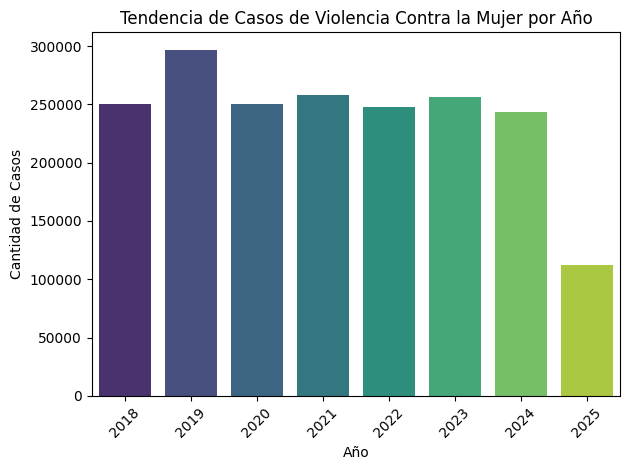

In [ ]:
 import matplotlib.pyplot as plt
 import seaborn as sns

 df_cases_per_year = df.groupby('AÑO')['CANTIDAD'].sum().reset_index()
 display(df_cases_per_year)

 df_copy.anual= df_2.groupby("AÑO")["CANTIDAD"].sum().reset_index()
 plt.figure()
 sns.barplot(data=df_copy.anual, x="AÑO", y="CANTIDAD", palette="viridis")
 plt.title("Tendencia de Casos de Violencia Contra la Mujer por Año")
 plt.xlabel("Año")
 plt.ylabel("Cantidad de Casos")
 plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()

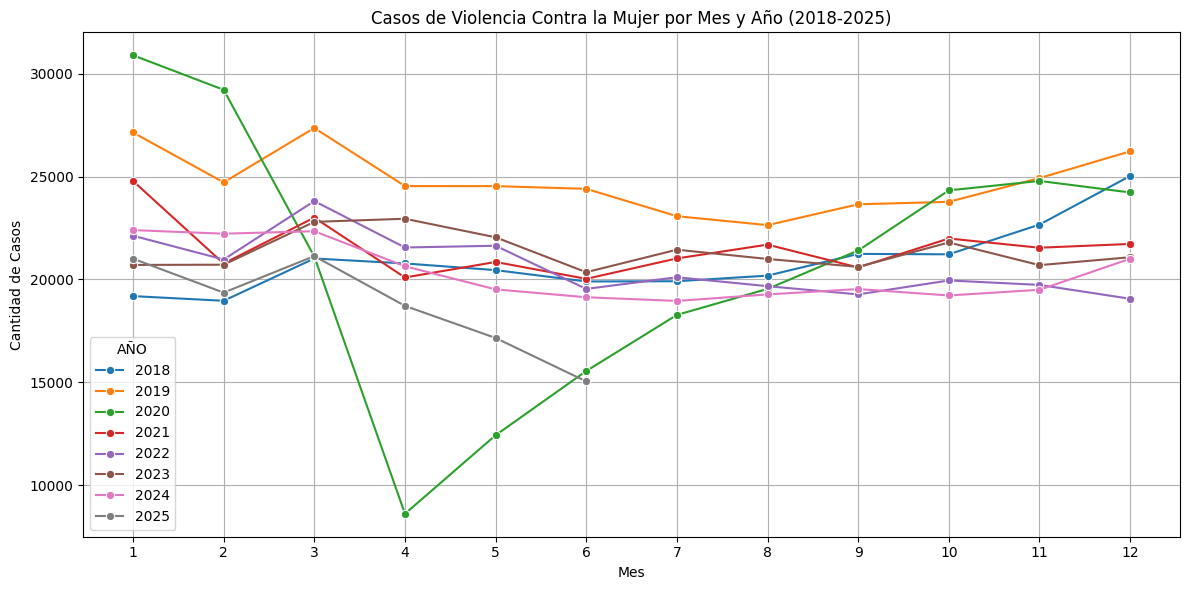

In [ ]:

df_año_filtro = df[(df['AÑO'] >= 2018) & (df['AÑO'] <= 2025)].copy()
df_meses_filtro = df_año_filtro.groupby(['AÑO', 'MES'])['CANTIDAD'].sum().reset_index()

plt.figure(figsize=(12, 6))
# grafico
sns.lineplot(data=df_cases_year_month, x="MES", y="CANTIDAD", hue="AÑO", marker='o', palette='tab10')
plt.title("Casos de Violencia Contra la Mujer por Mes y Año (2018-2025)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Casos")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

Impacto del COVID-19 (línea verde - 2020):

-Patrón anómalo muy evidente: 2020 muestra el comportamiento más irregular de todos los años
Pico extremo en enero: Más de 30,000 casos, el punto más alto de todo el dataset
Caída dramática en abril: Baja a menos de 9,000 casos (mínimo absoluto)
Recuperación gradual: Desde mayo aumenta progresivamente hasta normalizar en diciembre
Interpretación: Refleja claramente el impacto del confinamiento - acumulación de denuncias en enero, subregistro durante cuarentena estricta, y posterior normalización

,MES,CANTIDAD
0,1,30895
1,2,29216
2,3,21109
3,4,8602
4,5,12422
5,6,15544
6,7,18270
7,8,19535
8,9,21403
9,10,24327


/tmp/ipython-input-820506864.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




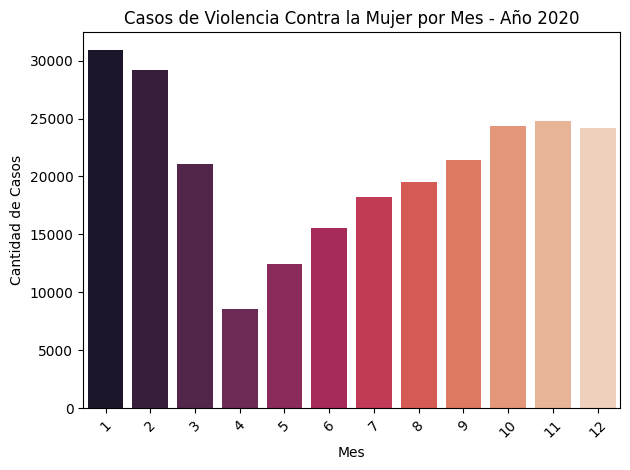

In [ ]:
df_2020 = df[df["AÑO"] == 2020]
casos_mes_max = df_2020.groupby("MES")["CANTIDAD"].sum().reset_index()
casos_por_mes = casos_mes_max.sort_values("MES")
display(casos_por_mes)
plt.figure()
sns.barplot(data=casos_por_mes, x="MES", y="CANTIDAD", palette="rocket")
plt.title("Casos de Violencia Contra la Mujer por Mes - Año 2020")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Casos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_cuentas["RIC"] = df_cuentas["75%"] - df_cuentas["25%"]

In [ ]:
#Diagrama de burbujas
import plotly.express as px

fig = px.scatter(df_cuentas, x="RIC", y="50%",
	         size="count", color="count",log_y=False,log_x=False,size_max=40)

fig.update_layout(title=go.layout.Title(
        text="DISTRIBUCION INTERCUARTIL DE distritos con mayor indice de violencia en el país"))
fig.show()

In [ ]:

df_grouped = df.groupby(['AÑO', 'PROV_HECHO'])['CANTIDAD'].sum().reset_index()

# lima y provincia
df_lima = df_grouped[df_grouped['PROV_HECHO'] == 'LIMA']
df_otras = df_grouped[df_grouped['PROV_HECHO'] != 'LIMA']

df_otras_grouped = df_otras.groupby('AÑO')['CANTIDAD'].sum().reset_index()
df_otras_grouped['PROV_HECHO'] = 'OTRAS PROVINCIAS'

df_lima = df_lima.rename(columns={'CANTIDAD': 'CASOS_LIMA'})
df_otras_grouped = df_otras_grouped.rename(columns={'CANTIDAD': 'CASOS_OTRAS'})

df_combined = pd.merge(df_lima[['AÑO', 'CASOS_LIMA']], df_otras_grouped[['AÑO', 'CASOS_OTRAS']], on='AÑO')

df_combined['TOTAL_CASOS'] = df_combined['CASOS_LIMA'] + df_combined['CASOS_OTRAS']

df_combined['PORCENTAJE_LIMA'] = (df_combined['CASOS_LIMA'] / df_combined['TOTAL_CASOS']) * 100
df_combined['PORCENTAJE_OTRAS'] = (df_combined['CASOS_OTRAS'] / df_combined['TOTAL_CASOS']) * 100

# Preparar datos para el gráfico apilado
df_plot = df_combined[['AÑO', 'PORCENTAJE_LIMA', 'PORCENTAJE_OTRAS']].melt(
    id_vars='AÑO', var_name='PROVINCIA', value_name='PORCENTAJE'
)
# Crear el gráfico
fig = px.bar(df_plot, y='AÑO', x='PORCENTAJE', color='PROVINCIA', orientation='h',
             title='Porcentaje de Casos de Violencia Contra la Mujer: Lima vs Otras Provincias por Año')

fig.update_layout(barmode='stack')
fig.show()
# Mostrar los porcentajes
display(df_combined[['AÑO', 'PORCENTAJE_LIMA', 'PORCENTAJE_OTRAS']])

,AÑO,PORCENTAJE_LIMA,PORCENTAJE_OTRAS
0,2018,33.035408,66.964592
1,2019,31.796737,68.203263
2,2020,31.036659,68.963341
3,2021,29.969579,70.030421
4,2022,31.769894,68.230106
5,2023,32.803948,67.196052
6,2024,33.091090,66.908910
7,2025,35.672848,64.327152


# Conclusiones Generales del Análisis de Violencia contra la Mujer en Perú (2018-2025)

**La pandemia COVID-19 causó una crisis dual: incremento real de violencia y colapso del sistema de registro**
El año 2020 evidencia claramente cómo una emergencia sanitaria puede agravar exponencialmente la violencia de género. El pico histórico de enero (31,500+ casos) seguido de la caída dramática a mínimos en abril (8,500 casos) no refleja una disminución real de violencia, sino el colapso del sistema de protección y registro.



**Lima concentra aproximadamente 1/3 de todos los casos nacionales, pero no es proporcionalmente la más violenta**

Los datos muestran consistentemente que Lima representa entre 29-36% de todos los casos de violencia contra la mujer en el país (según tabla mostrada). Sin embargo, esto responde más a su alta concentración poblacional que a una mayor tasa de violencia per cápita. El análisis de dispersión por distritos revela que existen zonas con índices de violencia relativa mucho más altos que Lima, sugiriendo que el problema es nacional y requiere atención diferenciada según la realidad territorial específica de cada región.
